In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv("data/Position_Salaries.csv")
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 1)
(3, 1)
(7,)
(3,)


## polynomial data transform

In [28]:
#지정한 degree로 X(특징)을 확장함
from sklearn.preprocessing import PolynomialFeatures
pos_poly = PolynomialFeatures(degree = 10)
pos_poly.fit(X_train)
Xp_train = pos_poly.transform(X_train)
Xp_test = pos_poly.transform(X_test)

In [29]:
print(Xp_train.shape)
print(Xp_test.shape)

(7, 11)
(3, 11)


In [30]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(Xp_train,y_train)

LinearRegression()

In [31]:
y_pred = poly_reg.predict(Xp_test)
y_pred

array([ 61440.5450782 , 579455.06437993, 109369.45627452])

In [32]:
sLR = LinearRegression()
sLR.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_slr = sLR.predict(X_test)

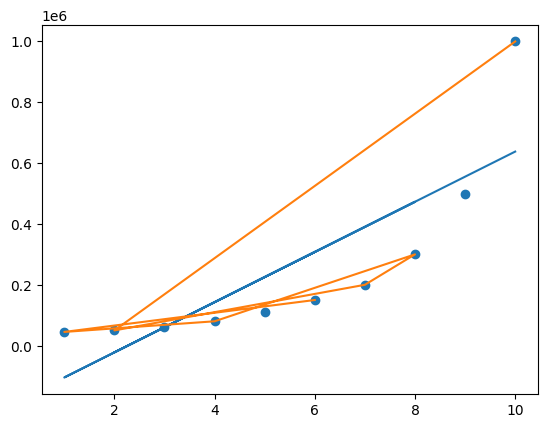

In [37]:
plt.scatter(X,y)
plt.plot(X_train, sLR.predict(X_train))
plt.plot(X_train,poly_reg.predict(Xp_train))